# Importing necessory Libraries

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from fcmeans import FCM

# Loading IRIS dataset

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

# Reducing dimensionality to Visualize data

In [40]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

#We are using PCA to reduce dimensions of data and we are reducing it to 2 from 4.
pca = sklearnPCA(n_components=2) #2-dimensional PCA
pca_2d = pd.DataFrame(pca.fit_transform(X))

# K-Means Algorithm Implementation

In [65]:
#number of clusters to be formed
k=3

#initial k samples drawn as initial centroids for clusters to be formed
centroids=random.sample(list(X),k)

#loop to find clusters
while True:
    #new cluster labels for data
    labels=[]
    
    #finding a label for data using minimum euclidean distance between data point and centroids
    for i in X:
        dist=[]
        c=0
        for j in centroids:
            dist.append((c,np.linalg.norm(i-j)))
            c+=1
        m=min(dist,key=lambda x:x[1])
        labels.append(m[0])

    #list for new centroids
    new_centroids=[[0 for n in range(4)] for j in range(k)]

    #data point count for each cluster
    vc=[0 for j in range(k)]
    
    #counting and adding data points for each cluster
    for i in range(len(labels)):
        new_centroids[labels[i]]=np.add(new_centroids[labels[i]],X[i])
        vc[labels[i]]+=1
    
    #finding new cluster centroids
    for i in range(len(new_centroids)):
        new_centroids[i]/=vc[i]
    
    #checking if old and new centroids are equal or not
    count=0
    for i in range(len(new_centroids)):
        if all(new_centroids[i]==centroids[i]):
            count+=1
    if count==k:
        break
        
    #setting new centroids as cluster centroids
    centroids=new_centroids
    
print('Done')

Done


### Performance Metrics

In [6]:
result=precision_recall_fscore_support(labels,y, average='weighted')
precision,recall,fscore=result[0],result[1],result[2]
accuracy=accuracy_score(labels, y)

print('Accuracy :',accuracy)
print('Precision :',precision)
print('Recall :',recall)
print('F1 Score :',fscore)

Accuracy : 0.58
Precision : 0.7964000000000001
Recall : 0.58
F1 Score : 0.6290705713070301


# Using in-built KMeans function

In [58]:
#Clustering using built-in function
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
actual=y

### Performance Metrics

In [59]:
result=precision_recall_fscore_support(kmeans.labels_,actual, average='weighted')
accuracy1=accuracy_score(kmeans.labels_, actual)
precision1,recall1,fscore1=result[0],result[1],result[2]

print('Accuracy :',accuracy1)
print('Precision :',precision1)
print('Recall :',recall1)
print('F1 Score :',fscore1)

Accuracy : 0.24
Precision : 0.1824
Recall : 0.24
F1 Score : 0.20727272727272728


# Scatter Plots

### Original Labels

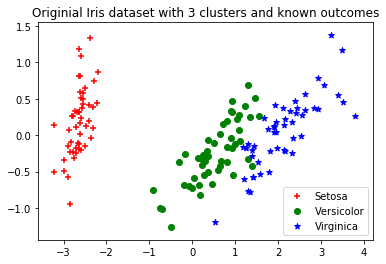

In [64]:
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='r',marker='+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='g',marker='o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='b',marker='*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
plt.title('Originial Iris dataset with 3 clusters and known outcomes')
plt.show()

### K-Means implementation labels

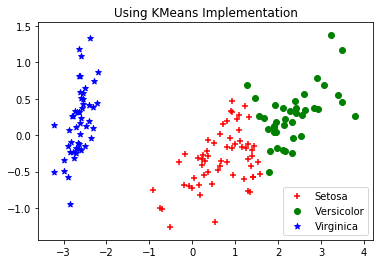

In [66]:
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='r',marker='+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='g',marker='o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='b',marker='*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
plt.title('Using KMeans Implementation')
plt.show()

### Built-in Kmeans labels

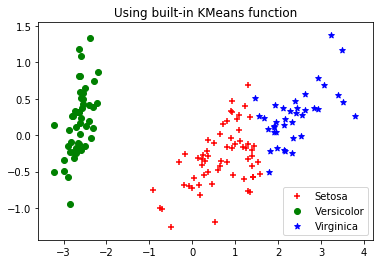

In [62]:
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='r',marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='g',marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[0][i],pca_2d[1][i],c='b',marker='*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
plt.title('Using built-in KMeans function')
plt.show()

# Observations

1. Both manual and built-in implementations works fine and produce good results.
2. Although performance metrics of nuilt-in KMeans doesn't match with the above point but clusters formed are quite identical to the original.
3. Clusters forming in manual implementation may not always be same when run multiple time it is due to the fact that we taking random K samples.
4. In built-in kmeans visualisation there's label mismatch but the overall cluster shape and size is almost similar to original. 